In [4]:
import numpy as np

X = np.array([
    [3, 22000, 1],
    [6, 75000, 0],
    [2, 14000, 1],
    [8, 85000, 0],
    [4, 50000, 1]
], dtype=float)

# Step 1: Standardize
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std

# Step 2: Covariance Matrix
cov_matrix = np.cov(X_std.T)

# Step 3: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

# Step 5: Project onto top 2 components
X_pca = np.dot(X_std, eigen_vectors[:, :2])
print("Reduced X (PCA):\n", X_pca)


Reduced X (PCA):
 [[ 1.46060919 -0.02977285]
 [-1.6093965  -0.3597175 ]
 [ 1.89708745 -0.31961626]
 [-2.35803385  0.12179788]
 [ 0.60973371  0.58730873]]


In [5]:
import matplotlib.pyplot as plt 

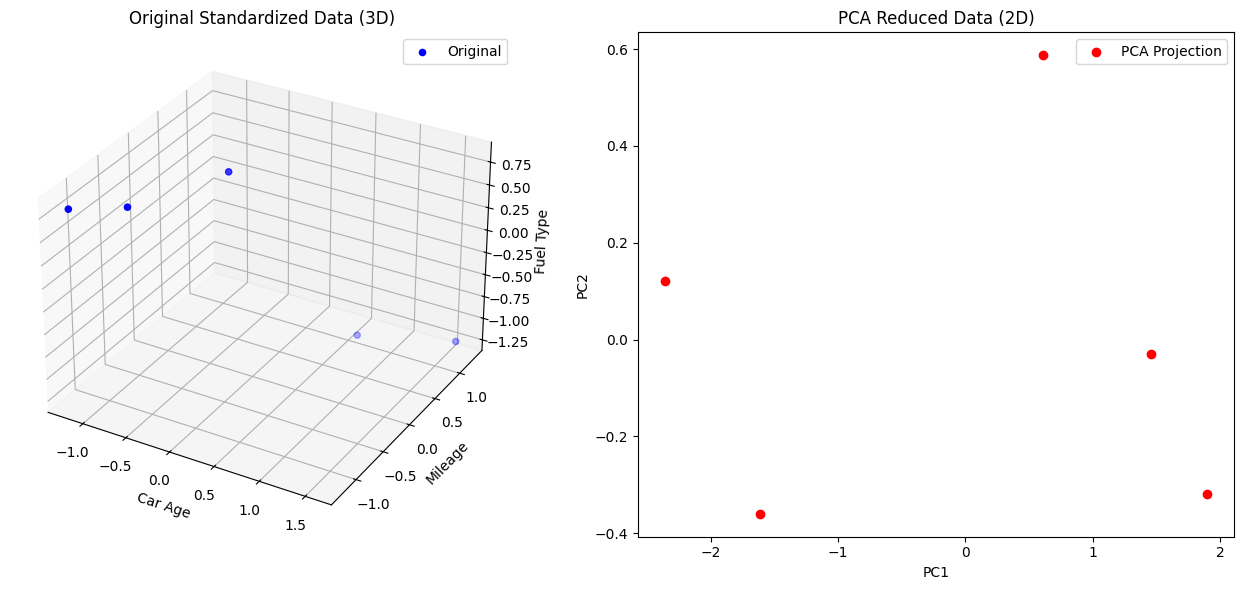

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 2], c='blue', label='Original')
ax1.set_title("Original Standardized Data (3D)")
ax1.set_xlabel("Car Age")
ax1.set_ylabel("Mileage")
ax1.set_zlabel("Fuel Type")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c='red', label='PCA Projection')
ax2.set_title("PCA Reduced Data (2D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()

plt.tight_layout()
plt.show()
